This notebook is just for maing a quick and nice visual to support the choice of intervention in the dataset. It's used in the dataset sectioin 3.1.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import umap
from sklearn.decomposition import PCA
import numpy as np
from loadData import loadDataset

rot = loadDataset('Data/Dataset/rot')['rubber_duck']
temp = loadDataset('Data/Dataset/temp')['rubber_duck']

In [2]:
x, y = rot[0].size
print(f"Image size: {x}x{y}")
print(f"ratio: {x/y:.2f}")

Image size: 2976x1984
ratio: 1.50


In [ ]:
# i am downscalling the images to less than half the original size (so actually a quarter becaus 2^2 is 4) due to the masive memory requirements of doing pca and umap on a 10GB matrix
from PIL import Image

def resize_images(image_list, size=(900, 600)):
    resized = []
    for img in image_list:
        img_copy = img.copy()
        img_copy = img_copy.resize(size, Image.LANCZOS)
        resized.append(img_copy)
    return resized

rot_resized = resize_images(rot)
temp_resized = resize_images(temp)

/home/albert/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/albert/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


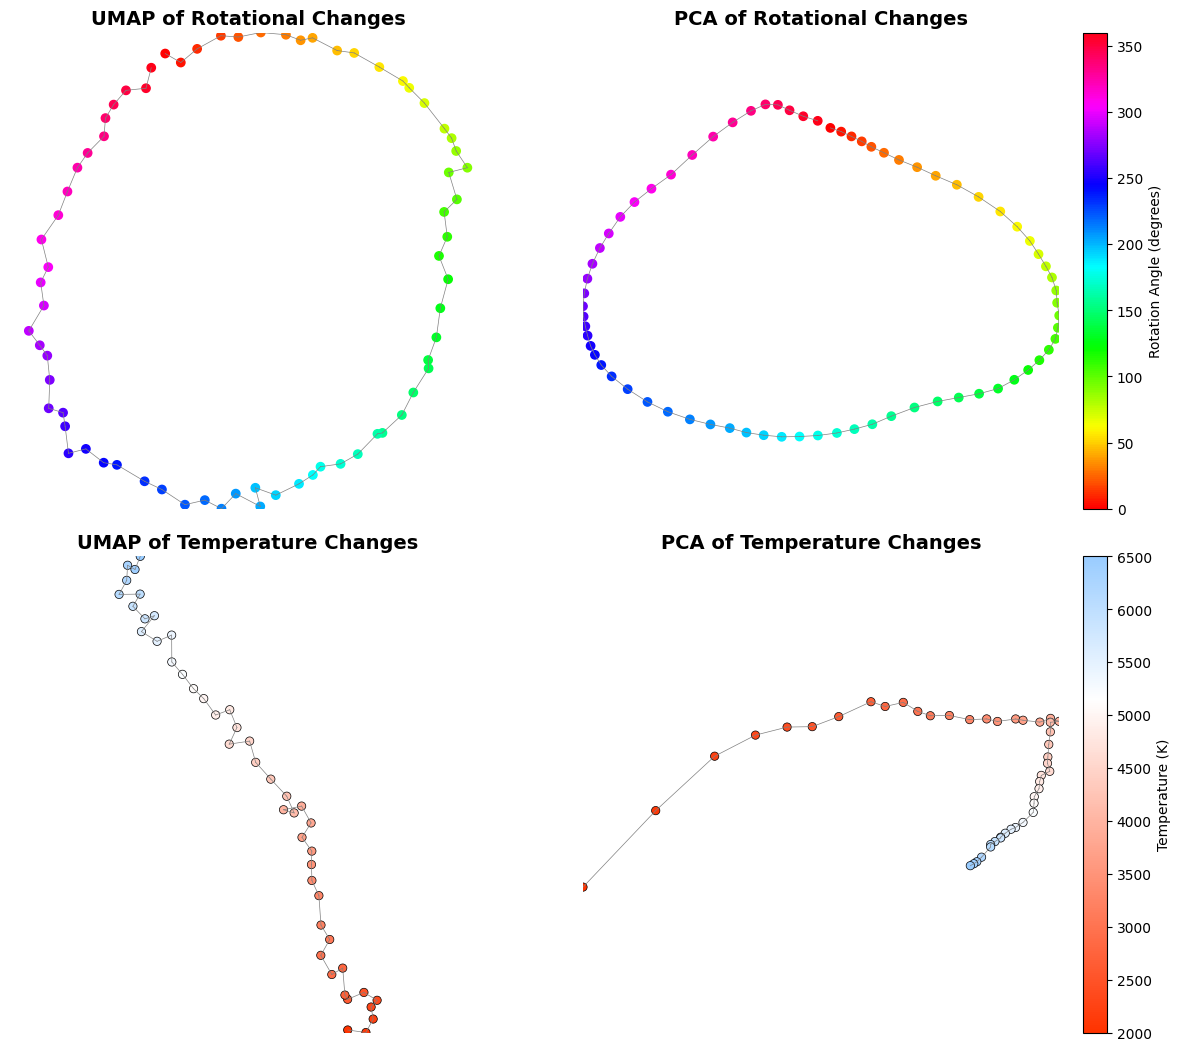

In [ ]:


# Convert PIL images to numpy arrays and flatten
rot_matrix = np.stack([np.array(img).flatten() for img in rot_resized])
temp_matrix = np.stack([np.array(img).flatten() for img in temp_resized])

# UMAP
rot_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(rot_matrix)
temp_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(temp_matrix)

# PCA
rot_pca = PCA(n_components=2).fit_transform(rot_matrix)
temp_pca = PCA(n_components=2).fit_transform(temp_matrix)

# Color values
angles = np.linspace(0, 360, len(rot_umap))
temps = np.linspace(2000, 6500, len(temp_umap))

# Custom colormap for temperature
temp_cmap = LinearSegmentedColormap.from_list(
    "temp_cmap",
    [(0, "#ff3300"), (0.7, "#ffffff"), (1, "#99ccff")]
)


# 2x2 fig with (10+2),10 for plots and cbar
fig, axs = plt.subplots(2, 2, figsize=(12, 10))






# UMAP Rot (top left)
sc1 = axs[0, 0].scatter(rot_umap[:, 0], rot_umap[:, 1], c=angles, cmap='hsv')
for i in range(len(rot_umap) - 1):
    axs[0, 0].plot(rot_umap[i:i+2, 0], rot_umap[i:i+2, 1], color='gray', linewidth=0.5)
axs[0, 0].set_title('UMAP of Rotational Changes', fontsize=14, fontweight='bold')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

# Set 1:1 aspect and square limits
umap_rot_min = np.min(rot_umap, axis=0)
umap_rot_max = np.max(rot_umap, axis=0)
umap_rot_center = (umap_rot_min + umap_rot_max) / 2
umap_rot_range = np.max(umap_rot_max - umap_rot_min)
axs[0, 0].set_xlim(umap_rot_center[0] - umap_rot_range/2, umap_rot_center[0] + umap_rot_range/2)
axs[0, 0].set_ylim(umap_rot_center[1] - umap_rot_range/2, umap_rot_center[1] + umap_rot_range/2)
axs[0, 0].set_aspect('equal', 'box')







# PCA Rot (top right)
sc2 = axs[0, 1].scatter(rot_pca[:, 0], rot_pca[:, 1], c=angles, cmap='hsv')
for i in range(len(rot_pca) - 1):
    axs[0, 1].plot(rot_pca[i:i+2, 0], rot_pca[i:i+2, 1], color='gray', linewidth=0.5)
axs[0, 1].set_title('PCA of Rotational Changes', fontsize=14, fontweight='bold')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

# Set 1:1 aspect and square limits
pca_rot_min = np.min(rot_pca, axis=0)
pca_rot_max = np.max(rot_pca, axis=0)
pca_rot_center = (pca_rot_min + pca_rot_max) / 2
pca_rot_range = np.max(pca_rot_max - pca_rot_min)
axs[0, 1].set_xlim(pca_rot_center[0] - pca_rot_range/2, pca_rot_center[0] + pca_rot_range/2)
axs[0, 1].set_ylim(pca_rot_center[1] - pca_rot_range/2, pca_rot_center[1] + pca_rot_range/2)
axs[0, 1].set_aspect('equal', 'box')









# UMAP Temp (bottom left)
sc3 = axs[1, 0].scatter(temp_umap[:, 0], temp_umap[:, 1], c=temps, cmap=temp_cmap, edgecolors='black', linewidths=0.5)
for j in range(len(temp_umap) - 1):
    axs[1, 0].plot(temp_umap[j:j+2, 0], temp_umap[j:j+2, 1], color='gray', linewidth=0.5)
axs[1, 0].set_title('UMAP of Temperature Changes', fontsize=14, fontweight='bold')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

# Set 1:1 aspect and square limits
umap_temp_min = np.min(temp_umap, axis=0)
umap_temp_max = np.max(temp_umap, axis=0)
umap_temp_center = (umap_temp_min + umap_temp_max) / 2
umap_temp_range = np.max(umap_temp_max - umap_temp_min)
axs[1, 0].set_xlim(umap_temp_center[0] - umap_temp_range/2, umap_temp_center[0] + umap_temp_range/2)
axs[1, 0].set_ylim(umap_temp_center[1] - umap_temp_range/2, umap_temp_center[1] + umap_temp_range/2)
axs[1, 0].set_aspect('equal', 'box')










# PCA Temp (bottom right)
sc4 = axs[1, 1].scatter(temp_pca[:, 0], temp_pca[:, 1], c=temps, cmap=temp_cmap, edgecolors='black', linewidths=0.5)
for j in range(len(temp_pca) - 1):
    axs[1, 1].plot(temp_pca[j:j+2, 0], temp_pca[j:j+2, 1], color='gray', linewidth=0.5)
axs[1, 1].set_title('PCA of Temperature Changes', fontsize=14, fontweight='bold')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

# Set 1:1 aspect and square limits
pca_temp_min = np.min(temp_pca, axis=0)
pca_temp_max = np.max(temp_pca, axis=0)
pca_temp_center = (pca_temp_min + pca_temp_max) / 2
pca_temp_range = np.max(pca_temp_max - pca_temp_min)
axs[1, 1].set_xlim(pca_temp_center[0] - pca_temp_range/2, pca_temp_center[0] + pca_temp_range/2)
axs[1, 1].set_ylim(pca_temp_center[1] - pca_temp_range/2, pca_temp_center[1] + pca_temp_range/2)
axs[1, 1].set_aspect('equal', 'box')








# This can adjust subplots margins and spacing inbetween them
fig.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0, wspace=0.0, hspace=0.1)

# Add colorbars
cbar1 = fig.colorbar(sc1, ax=[axs[0, 0], axs[0, 1]], orientation='vertical', fraction=0.025, pad=0.02)
cbar1.set_label('Rotation Angle (degrees)')
cbar2 = fig.colorbar(sc3, ax=[axs[1, 0], axs[1, 1]], orientation='vertical', fraction=0.025, pad=0.02)
cbar2.set_label('Temperature (K)')

for ax in axs.flat:
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.show()